In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import gradio as gr

In [2]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
final_dataset = ratings.pivot(index='movieId', columns = "userId", values="rating")

In [6]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
final_dataset.fillna(0, inplace = True)

In [8]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


### Removing noise from dataset

In [10]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movie_voted = ratings.groupby('userId')['rating'].agg('count')

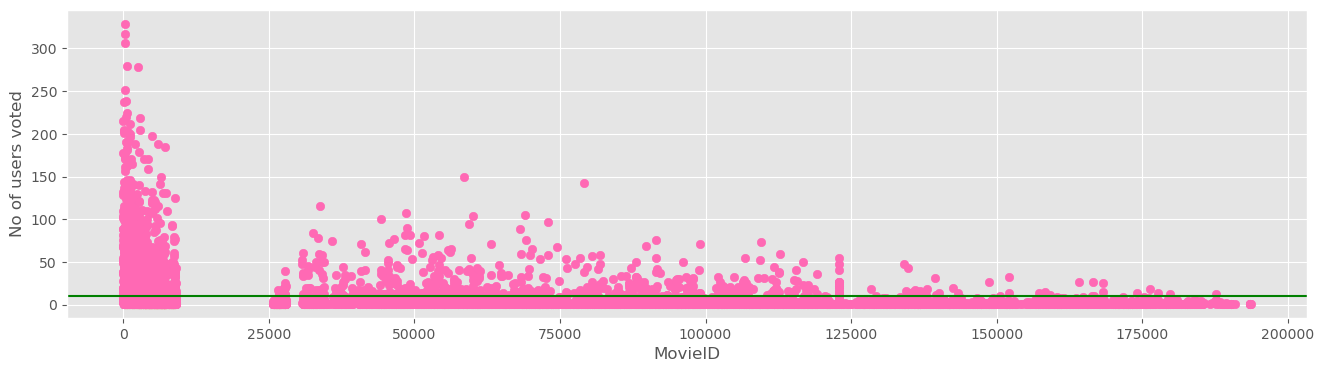

In [11]:
plt.style.use("ggplot")
fig, axes = plt.subplots(1,1, figsize=(16,4))
plt.scatter(no_user_voted.index, no_user_voted, color='hotpink')
plt.axhline(y = 10, color='green')
plt.xlabel("MovieID")
plt.ylabel("No of users voted")
plt.show()

In [12]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted>10].index,:]

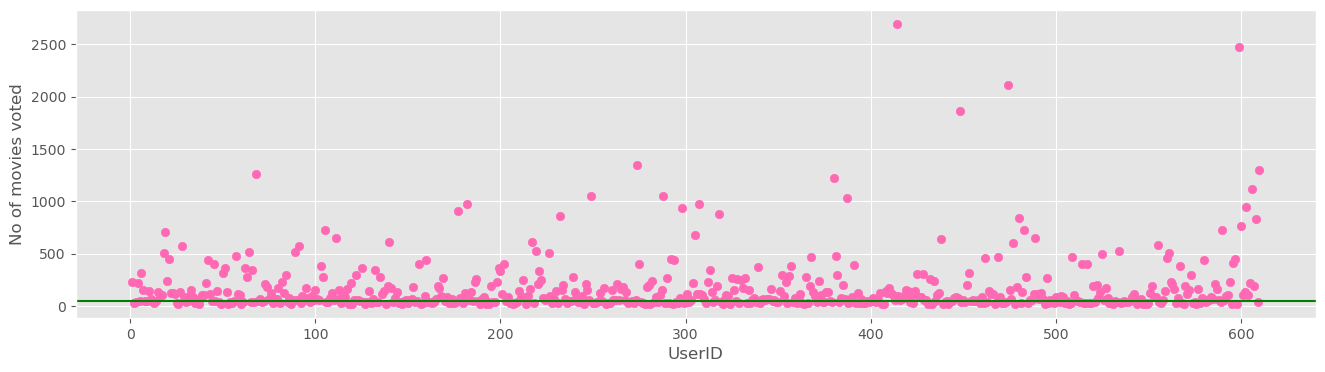

In [13]:
fig, axes = plt.subplots(1,1, figsize=(16,4))
plt.scatter(no_movie_voted.index, no_movie_voted, color='hotpink')
plt.axhline(y = 50, color='green')
plt.xlabel("UserID")
plt.ylabel("No of movies voted")
plt.show()

In [14]:
final_dataset = final_dataset.loc[:, no_movie_voted[no_movie_voted > 50].index]

In [15]:
final_dataset.shape

(2121, 378)

In [16]:
final_dataset.head()

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


In [17]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace = True)

In [18]:
print(csr_data)

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (2118, 205)	4.0
  (2118, 345)	1.5
  (2118, 357)	4.0
  (2118, 369)	4.5
  (2119, 37)	3.5
  (2119, 62)	3.0
  (2119, 98)	0.5
  (2119, 127)	4.5
  (2119, 156)	4.5
  (2119, 236)	0.5
  (2119, 256)	4.5
  (2119, 317)	2.0
  (2119, 345)	2.0
  (2119, 357)	5.0
  (2119, 365)	3.5
  (2120, 37)	4.0
  (2120, 62)	5.0
  (2120, 146)	2.5
  (2120, 155)	4.5
  (2120, 156)	5.0
  (2120, 186)	5.0
  (2120, 205)	4.0
  (2120, 236)	3.0
  (2120, 317)	3.5
  (2120, 357)	4.0


In [19]:
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors = 20, n_jobs = -1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [20]:
def get_recommendation(movie_name):
    movie_list = movies[movies['title'].str.contains(movie_name)]

    if len(movie_list):
        movie_idx = movie_list.iloc[0]["movieId"]
        movie_idx = final_dataset[final_dataset["movieId"] == movie_idx].index[0]
        distance, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors = 10+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distance.squeeze().tolist())), key = lambda x: x[1])[:0:-1]

        recommended_movies = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommended_movies.append({'Title': movies.iloc[idx]['title'].values[0]})
        df = pd.DataFrame(recommended_movies, index=range(1,11))
        return df
    else:
        return "Movies not found"

In [21]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [22]:
get_recommendation("Iron Man")

,Title
1,Up (2009)
2,Guardians of the Galaxy (2014)
3,Watchmen (2009)
4,Star Trek (2009)
5,Batman Begins (2005)
6,Avatar (2009)
7,Iron Man 2 (2010)
8,WALL·E (2008)
9,"Dark Knight, The (2008)"
10,"Avengers, The (2012)"


In [23]:
# pip install gradio --timeout 300

In [27]:
import gradio as gr
import pandas as pd

def recommend_movies(movie_name):
    # Assuming get_recommendation returns a DataFrame or some error message
    df = get_recommendation(movie_name)
    if isinstance(df, pd.DataFrame):
        return '\n'.join(df['Title'].tolist())
    else:
        return df

app = gr.Interface(
    fn=recommend_movies,
    inputs=gr.Textbox(label="Movie Name"),
    outputs=gr.Textbox(label="Recommended Movies"),
    title="Personalized Movie Recommendation System",
    description="Enter the name of a movie you like. The system will suggest similar movies based on user ratings."
)

app.launch(inbrowser=True)


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
